In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [37]:
X_MIN=-100
X_MAX=100
Y_MIN=-20
Y_MAX=20
POINT_COUNT=300
COLORMAP = {1:'r', 2:'g', 3:'b'}
ITERATION_COUNT = 4

In [2]:
def generate_random_points(x_min, x_max, y_min, y_max, point_count):
    x = np.random.randint(x_min, x_max, point_count)
    y = np.random.randint(y_min, y_max, point_count)
    points = pd.DataFrame({
        'x':x,
        'y':y
    })
    return points

In [7]:
points = generate_random_points(X_MIN, X_MAX, Y_MIN, Y_MAX, POINT_COUNT)

In [8]:
print(points.head())

    x   y
0  23 -18
1 -40  18
2 -83   7
3  71  -4
4  69   8


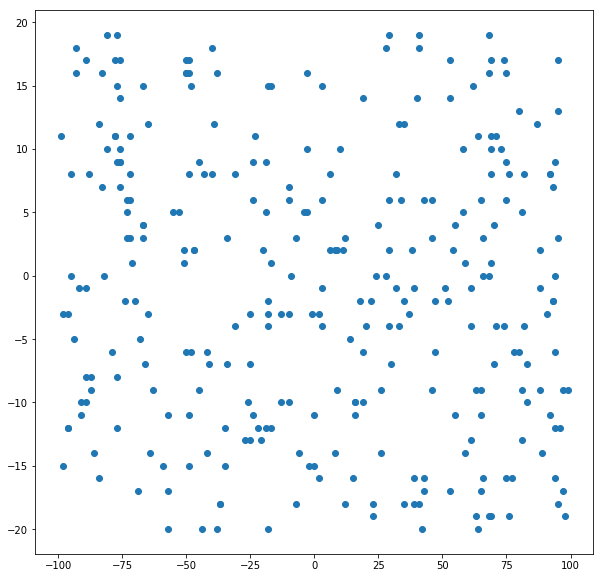

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(points['x'], points['y'])
plt.show()

In [11]:
centroids = {k:[np.random.randint(X_MIN, X_MAX), np.random.randint(Y_MIN, Y_MAX)]
            for k in COLORMAP.keys()}

In [22]:
def euclidean_dist(x_1, y_1, x_2, y_2):
    return np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2)

def assign_points_to_cluster(points, centroids, colormap):
    dist_cols = []
    for centroid in centroids.keys():
        col_name = 'dist_to_{}'.format(centroid)
        dist = euclidean_dist(points['x'], points['y'],
                              centroids[centroid][0], centroids[centroid][1])
        points[col_name] = dist
        dist_cols.append(col_name)
    points['closest'] = points.loc[:, dist_cols].idxmin(axis=1)
    points['closest'] = points['closest'].map(lambda x: colormap[int(x.lstrip('dist_to_'))])
    print(points.head())

In [23]:
assign_points_to_cluster(points, centroids, COLORMAP)

    x   y   dist_to_1   dist_to_2  dist_to_3 closest
0  23 -18   12.806248   57.489129  33.421550       r
1 -40  18   78.185676  121.202310  43.174066       b
2 -83   7  117.239072  162.443836  85.005882       b
3  71  -4   38.470768    8.062258  70.035705       g
4  69   8   40.249224   16.401219  67.000000       g


In [31]:
def show_clusters(points, centroids, colormap, old_centroids=None):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    plt.scatter(points['x'], points['y'], color=points['closest'], alpha=0.3)
    for centroid in centroids.keys():
        plt.scatter(*centroids[centroid], color=colormap[centroid])
    if old_centroids is not None:
        for centroid in centroids:
            x = old_centroids[centroid][0]
            y = old_centroids[centroid][1]
            dx = centroids[centroid][0] - x
            dy = centroids[centroid][1] - y
            ax.arrow(x, y, dx, dy)

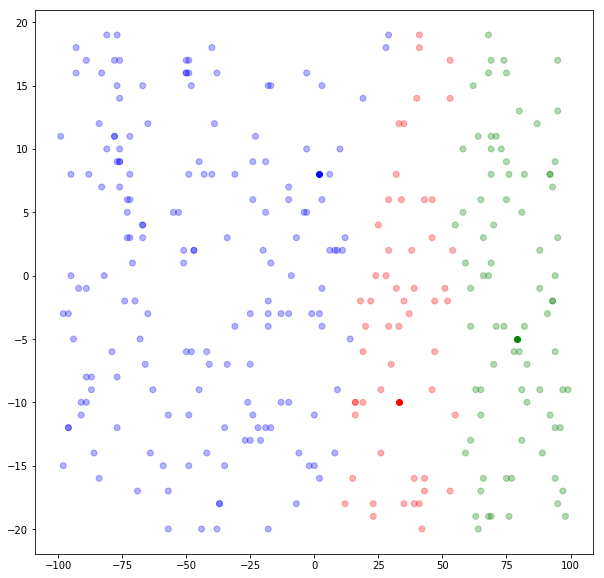

In [25]:
show_clusters(points, centroids, COLORMAP)

In [26]:
def update_centroids(points, centroids, colormap):
    new_centroids = copy.deepcopy(centroids)
    for centroid in centroids.keys():
        clr = colormap[centroid]
        new_centroids[centroid][0] = np.mean(points[points['closest']==clr]['x'])
        new_centroids[centroid][1] = np.mean(points[points['closest']==clr]['y'])
    return new_centroids

In [28]:
new_centroids = update_centroids(points, centroids, COLORMAP)

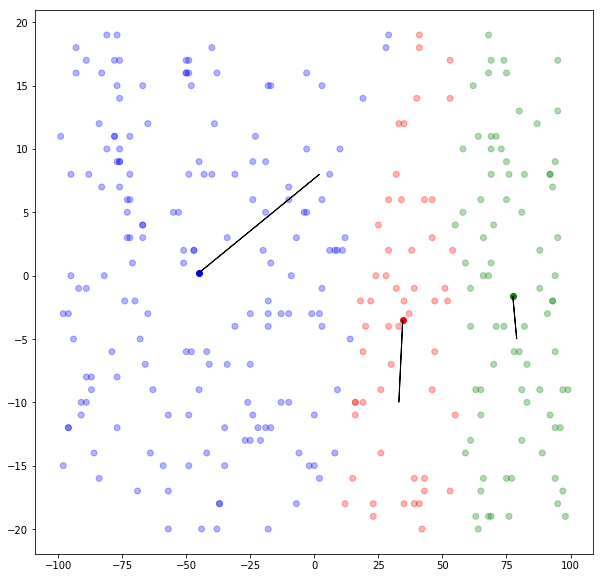

In [32]:
show_clusters(points, new_centroids, COLORMAP, centroids)

    x   y   dist_to_1   dist_to_2   dist_to_3 closest
0  23 -18   18.477751   56.886517   70.395129       r
1 -40  18   77.550590  119.100906   18.459448       b
2 -83   7  117.971518  160.705945   38.604474       b
3  71  -4   36.502936    6.901143  116.071039       g
4  69   8   36.377922   12.815061  114.258550       g


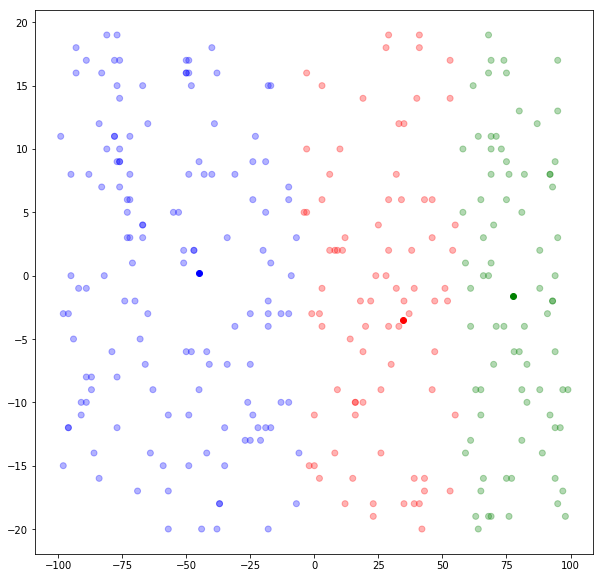

In [35]:
centroids = new_centroids
assign_points_to_cluster(points, centroids, COLORMAP)
show_clusters(points, centroids, COLORMAP)

    x   y   dist_to_1  dist_to_2   dist_to_3 closest
0  31   2   41.436699  40.853396   44.643029       g
1 -42 -12  115.446958  45.453273  116.017240       g
2 -55 -10  127.675370  55.072679  129.000000       g
3 -18 -13   92.655275  31.953091   92.048900       g
4  10 -14   67.082039  35.355339   64.124878       g
    x   y   dist_to_1  dist_to_2   dist_to_3 closest
0  31   2   29.115583  68.541681   37.069129       r
1 -42 -12  103.415266  12.451590  108.369240       g
2 -55 -10  115.828646  19.965022  121.335902       g
3 -18 -13   80.333583  23.222018   84.418429       g
4  10 -14   54.370999  49.411356   56.536568       g
    x   y   dist_to_1  dist_to_2   dist_to_3 closest
0  31   2   15.393564  77.225577   39.148652       r
1 -42 -12   89.646780  11.865967  110.282288       g
2 -55 -10  102.057803  12.685021  123.264151       g
3 -18 -13   66.638041  30.663445   86.316301       g
4  10 -14   41.195208  57.680708   58.401295       r
    x   y  dist_to_1  dist_to_2   dist_to_3 cl

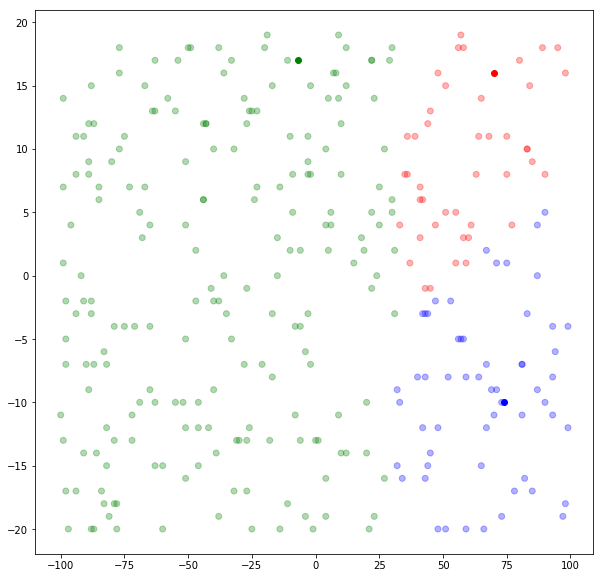

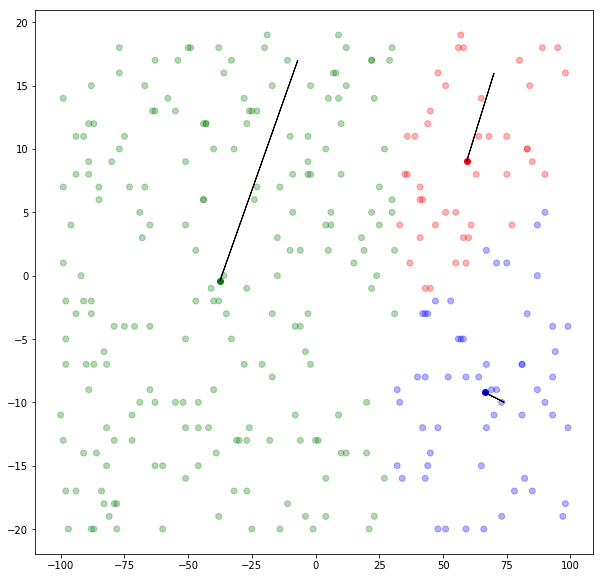

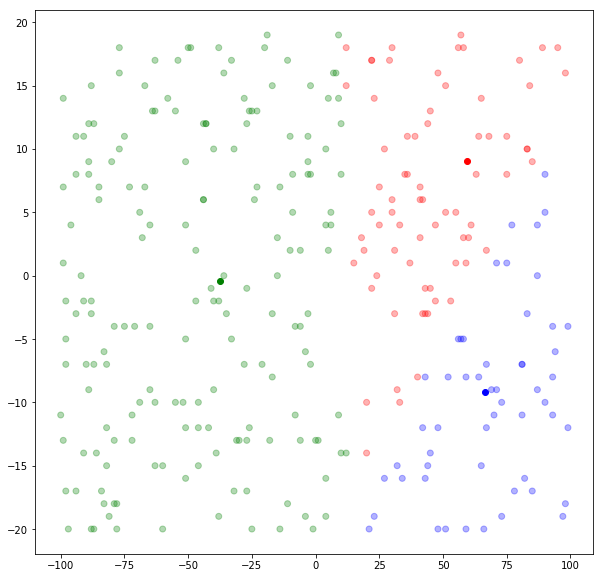

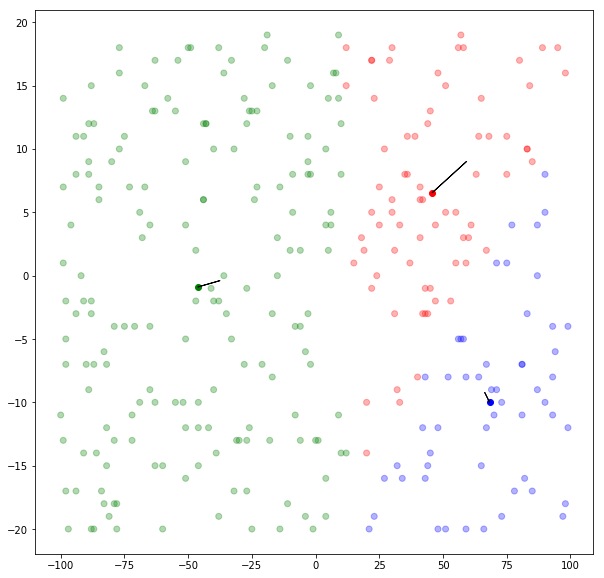

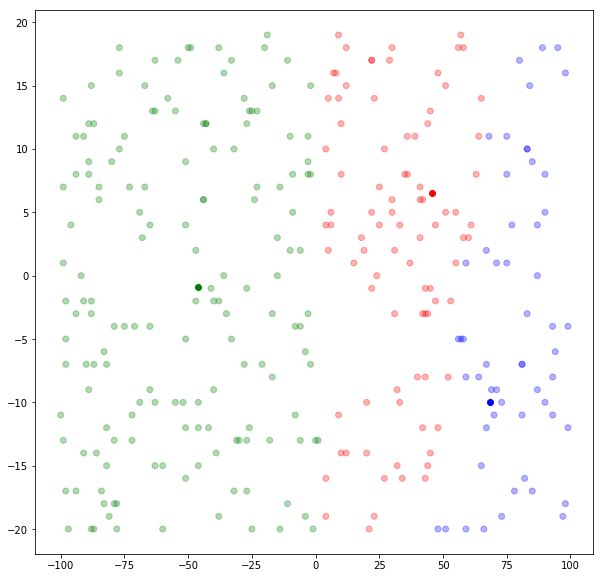

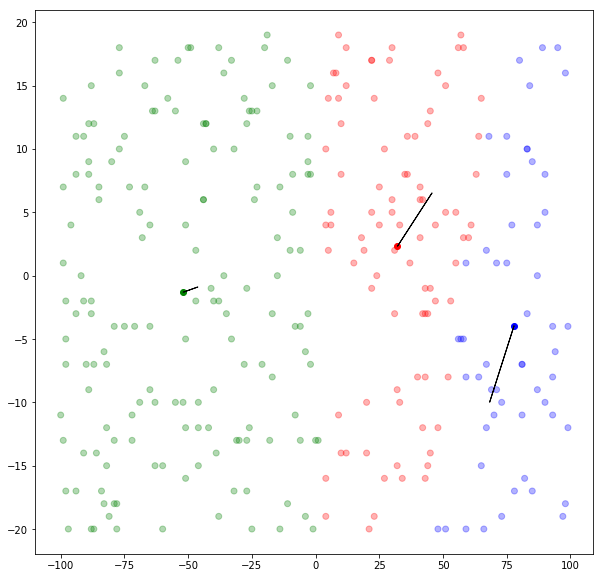

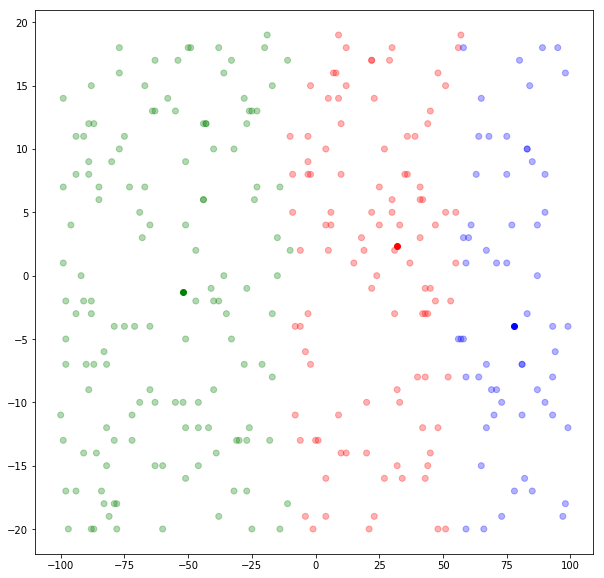

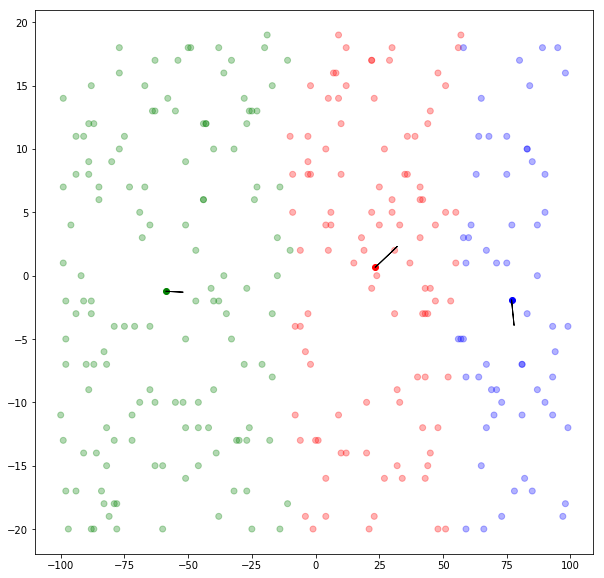

In [38]:
points = generate_random_points(X_MIN, X_MAX, Y_MIN, Y_MAX, POINT_COUNT)
centroids = {k:[np.random.randint(X_MIN, X_MAX), np.random.randint(Y_MIN, Y_MAX)]
            for k in COLORMAP.keys()}
for _ in range(ITERATION_COUNT):
    assign_points_to_cluster(points, centroids, COLORMAP)
    show_clusters(points, centroids, COLORMAP)
    new_centroids = update_centroids(points, centroids, COLORMAP)
    show_clusters(points, new_centroids, COLORMAP, centroids)
    centroids = new_centroids